In [152]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [153]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [154]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [155]:
import time
from pandas_datareader import data as pdr
import datetime
import yfinance as yf
yf.pdr_override()

In [156]:
meta = pdr.get_data_yahoo("META", start="2000-01-01", end="2020-12-31")

[*********************100%***********************]  1 of 1 completed


In [157]:
amzn = pdr.get_data_yahoo("AMZN", start="2000-01-01", end="2020-12-31")

[*********************100%***********************]  1 of 1 completed


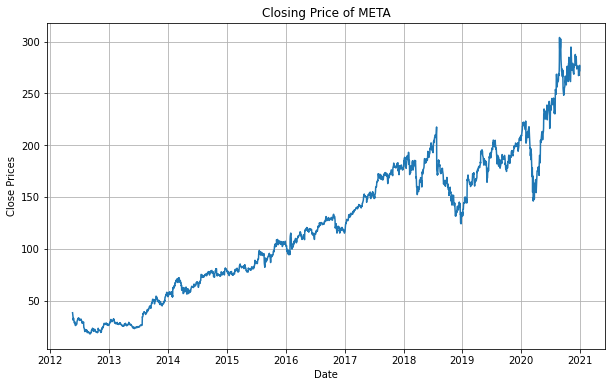

In [158]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(meta['Close'])
plt.title('Closing Price of META')
plt.show()

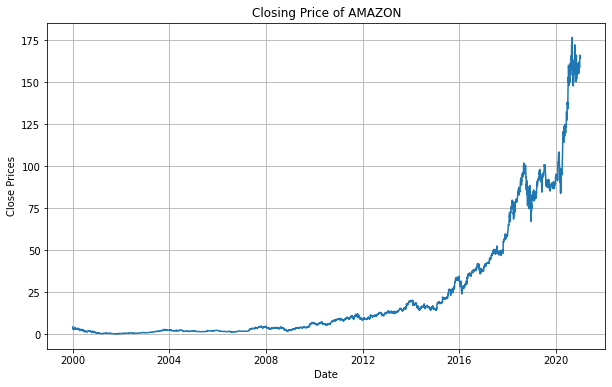

In [159]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(amzn['Close'])
plt.title('Closing Price of AMAZON')
plt.show()

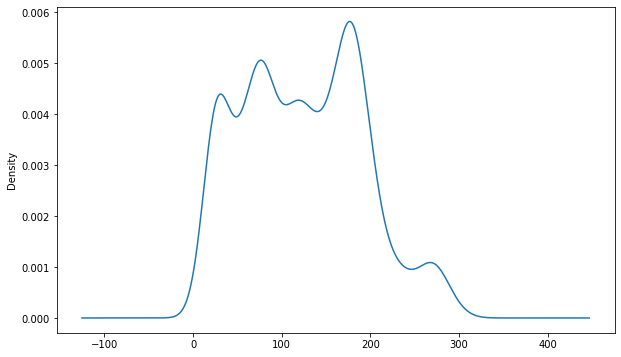

In [160]:
df_close = meta['Close']
df_close.plot(kind='kde')

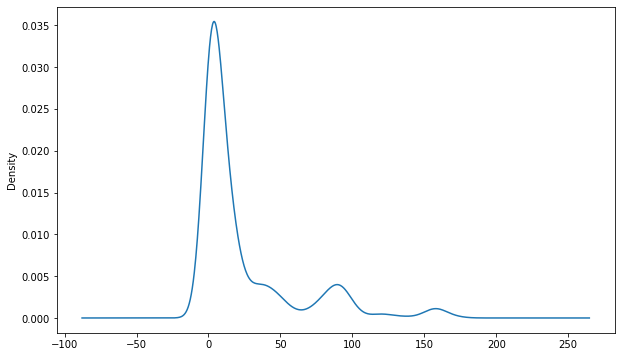

In [161]:
df_closee = amzn['Close']
df_closee.plot(kind='kde')

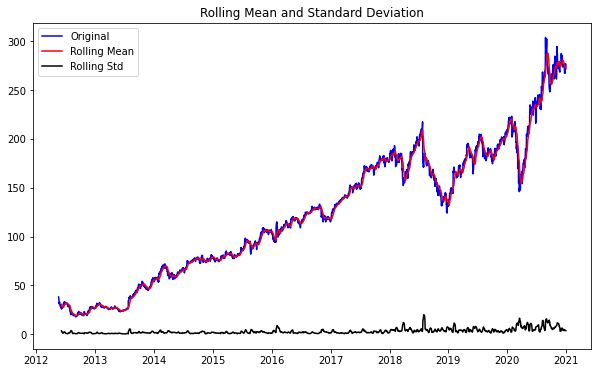

Results of dickey fuller test
Test Statistics                   0.007499
p-value                           0.959148
No. of lags used                 26.000000
Number of observations used    2142.000000
critical value (1%)              -3.433407
critical value (5%)              -2.862890
critical value (10%)             -2.567489
dtype: float64


In [162]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

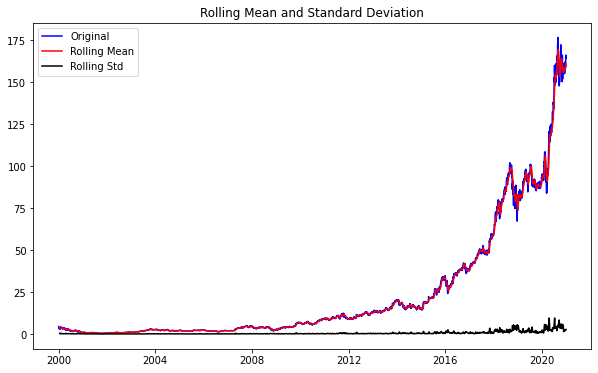

Results of dickey fuller test
Test Statistics                   3.950799
p-value                           1.000000
No. of lags used                 33.000000
Number of observations used    5249.000000
critical value (1%)              -3.431596
critical value (5%)              -2.862091
critical value (10%)             -2.567063
dtype: float64


In [163]:
def test_stationarityy(timeseriess):
    #Determing rolling statistics
    rolmeann = timeseriess.rolling(12).mean()
    rolstdd = timeseriess.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseriess, color='blue',label='Original')
    plt.plot(rolmeann, color='red', label='Rolling Mean')
    plt.plot(rolstdd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adftt = adfuller(timeseriess,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    outputt = pd.Series(adftt[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adftt[4].items():
        outputt['critical value (%s)'%key] =  values
    print(outputt)
test_stationarityy(df_closee)

<Figure size 720x432 with 0 Axes>

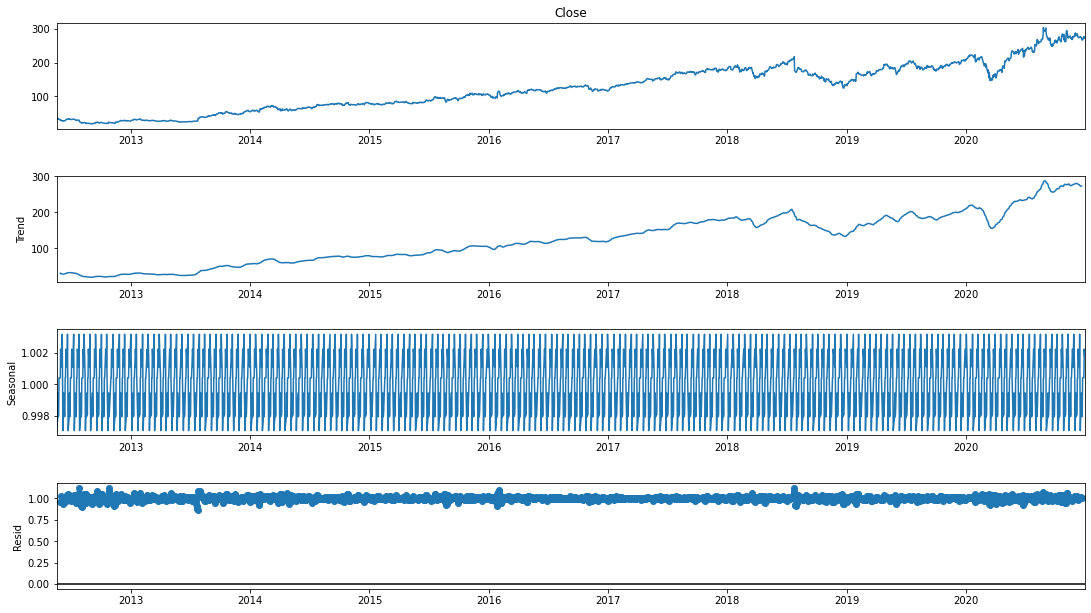

In [164]:
result = seasonal_decompose(df_close, model='multiplicative', period=12)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

<Figure size 720x432 with 0 Axes>

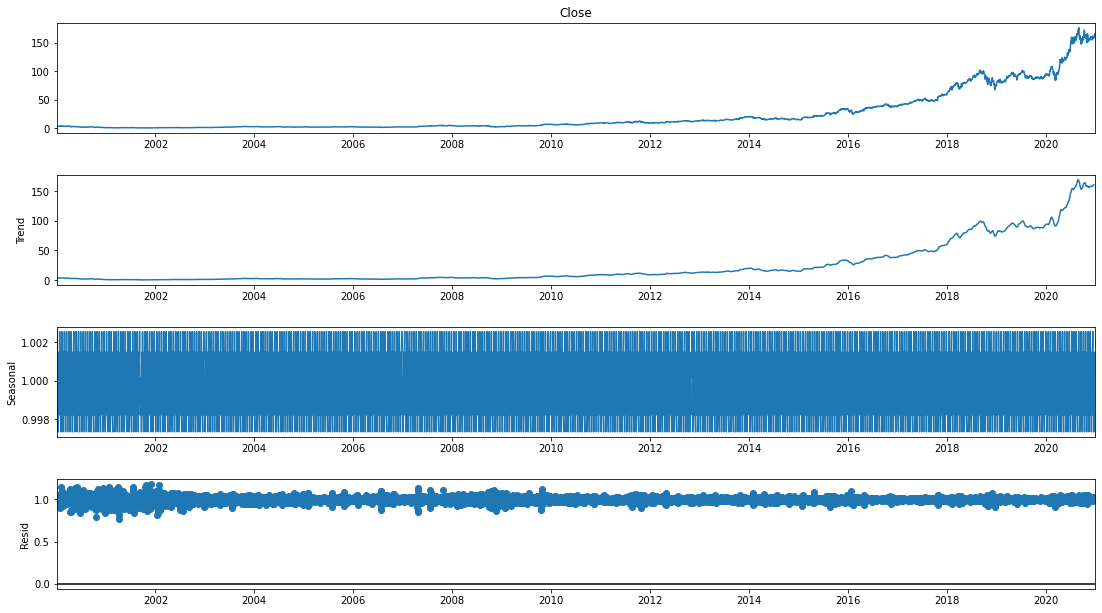

In [165]:
resultt = seasonal_decompose(df_closee, model='multiplicative', period=12)
figg = plt.figure()  
figg = resultt.plot()  
figg.set_size_inches(16, 9)

No handles with labels found to put in legend.


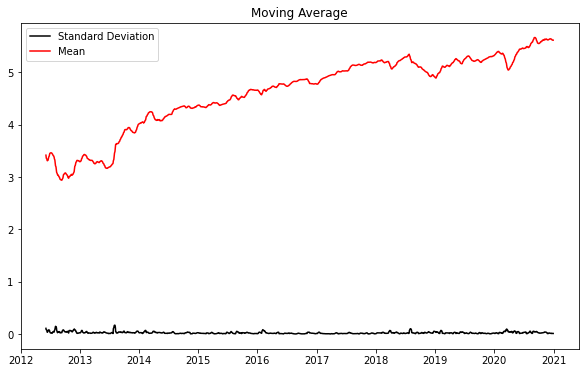

In [166]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

No handles with labels found to put in legend.


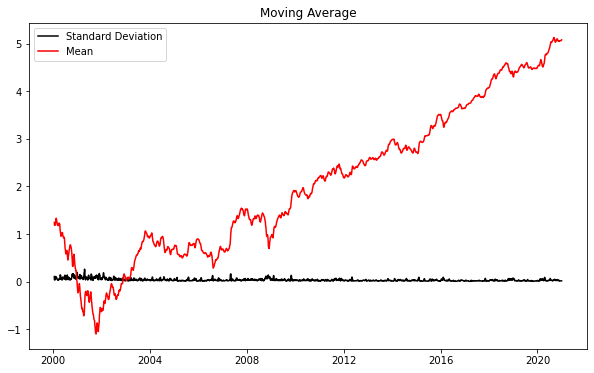

In [167]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_logg = np.log(df_closee)
moving_avgg = df_logg.rolling(12).mean()
std_devv = df_logg.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_devv, color ="black", label = "Standard Deviation")
plt.plot(moving_avgg, color="red", label = "Mean")
plt.legend()
plt.show()

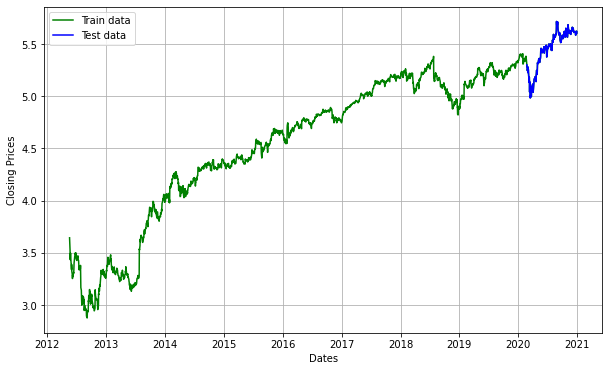

In [168]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

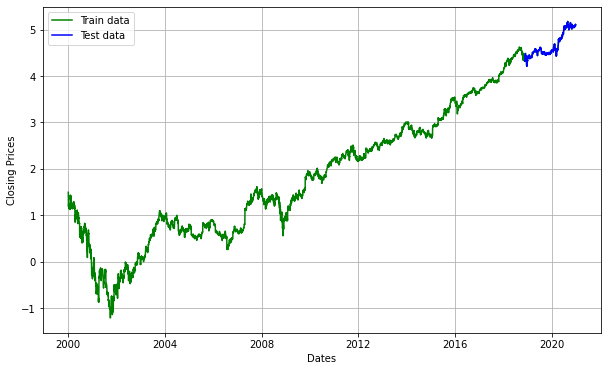

In [169]:
train_dataa, test_dataa = df_logg[3:int(len(df_logg)*0.9)], df_logg[int(len(df_logg)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_logg, 'green', label='Train data')
plt.plot(test_dataa, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-9290.365, Time=1.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9298.323, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9296.324, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9296.311, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9296.644, Time=0.46 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9294.327, Time=4.67 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 7.240 seconds


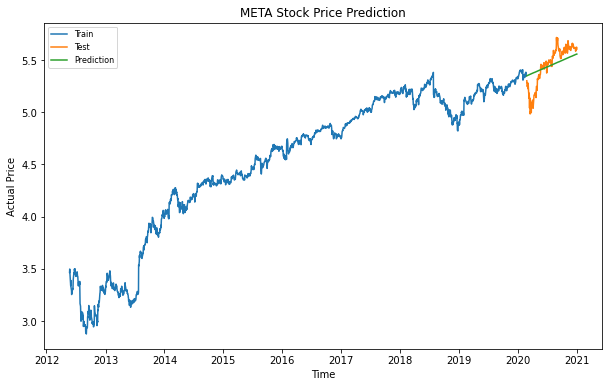

In [170]:
model = auto_arima(train_data, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train_data)
forecast = model.predict(n_periods=len(test_data))
forecast = pd.DataFrame(forecast, index=test_data.index, columns=['Prediction'])

plt.plot(train_data, label = 'Train')
plt.plot(test_data, label='Test')
plt.plot(forecast, label='Prediction')
plt.title('META Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-18926.930, Time=5.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-18923.305, Time=1.48 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-18921.305, Time=1.38 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-18921.305, Time=2.55 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-18923.397, Time=0.68 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-18928.402, Time=4.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-18930.485, Time=4.98 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-18928.534, Time=4.91 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-18919.303, Time=6.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-18927.127, Time=4.26 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-18930.381, Time=0.92 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 36.772 seconds


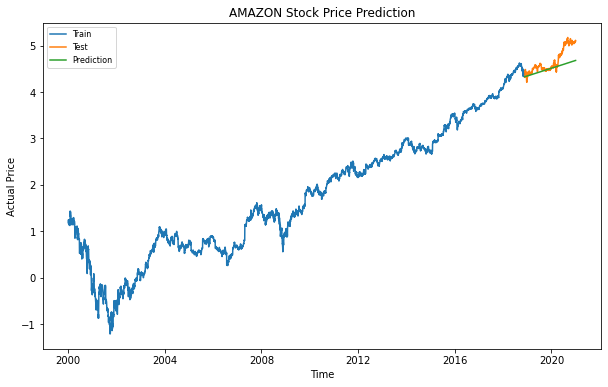

In [171]:
modell = auto_arima(train_dataa, trace=True, error_action='ignore', suppress_warnings=True)
modell.fit(train_dataa)
forecastt = modell.predict(n_periods=len(test_dataa))
forecastt = pd.DataFrame(forecastt, index=test_dataa.index, columns=['Prediction'])

plt.plot(train_dataa, label = 'Train')
plt.plot(test_dataa, label='Test')
plt.plot(forecastt, label='Prediction')
plt.title('AMAZON Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [172]:
mse = mean_squared_error(test_data, forecast)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, forecast)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, forecast))
print('RMSE: '+str(rmse))

MSE: 0.018319259476467828
MAE: 0.1055257939173986
RMSE: 0.1353486589385644


In [173]:
mse2 = mean_squared_error(test_dataa, forecastt)
print('MSE: '+str(mse2))
mae2 = mean_absolute_error(test_dataa, forecastt)
print('MAE: '+str(mae2))
rmse2 = math.sqrt(mean_squared_error(test_dataa, forecastt))
print('RMSE: '+str(rmse))

MSE: 0.055357078777230236
MAE: 0.1711446388717124
RMSE: 0.1353486589385644


# **SARIMA**

In [174]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX

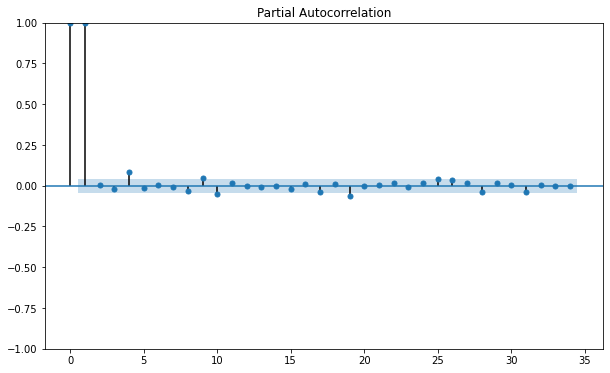

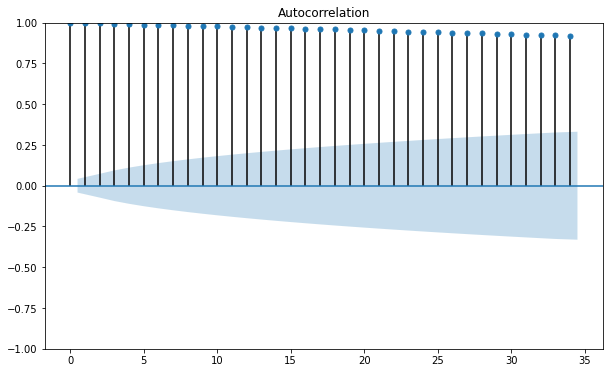

In [175]:
plot_pacf(df_close);
plot_acf(df_close);

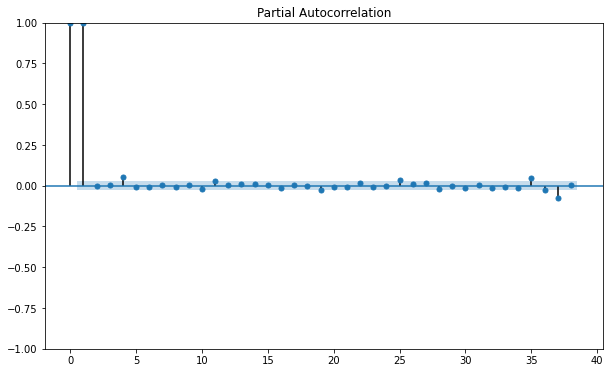

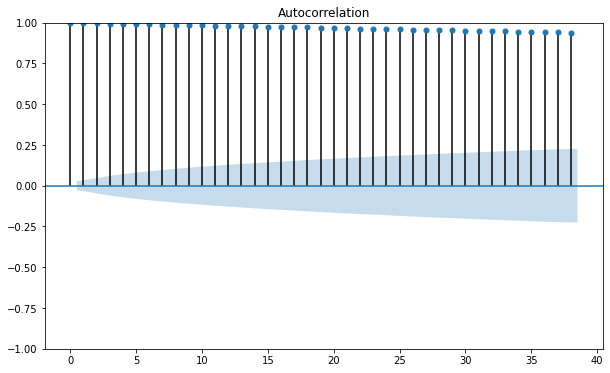

In [176]:
plot_pacf(df_closee);
plot_acf(df_closee);

In [177]:
import statsmodels.api as sm

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2168
Model:               SARIMAX(4, 0, 4)   Log Likelihood               -5455.262
Date:                Sat, 09 Jul 2022   AIC                          10930.524
Time:                        10:08:20   BIC                          10987.339
Sample:                             0   HQIC                         10951.300
                               - 2168                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1316      0.080      1.648      0.099      -0.025       0.288
ar.L1         -0.9916      0.353     -2.810      0.005      -1.683      -0.300
ar.L2          0.4362      0.384      1.137      0.2

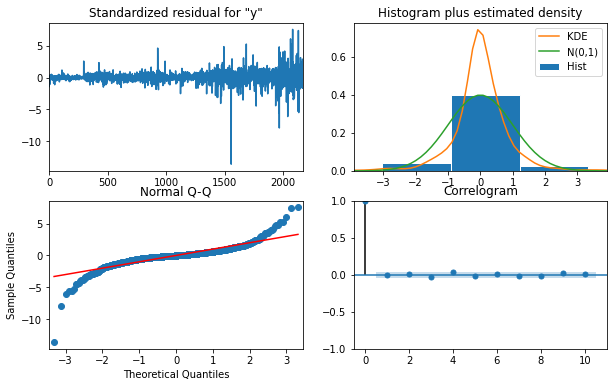

In [178]:
train_sample = meta["Close"].diff().iloc[1:].values
modell = sm.tsa.SARIMAX(train_sample,order=(4,0,4),trend='c')
result = modell.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5282
Model:               SARIMAX(4, 0, 4)   Log Likelihood               -6763.913
Date:                Sat, 09 Jul 2022   AIC                          13547.826
Time:                        10:09:09   BIC                          13613.546
Sample:                             0   HQIC                         13570.796
                               - 5282                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0453      0.018      2.517      0.012       0.010       0.081
ar.L1         -0.1399      0.004    -39.788      0.000      -0.147      -0.133
ar.L2          0.7464      0.004    203.522      0.0

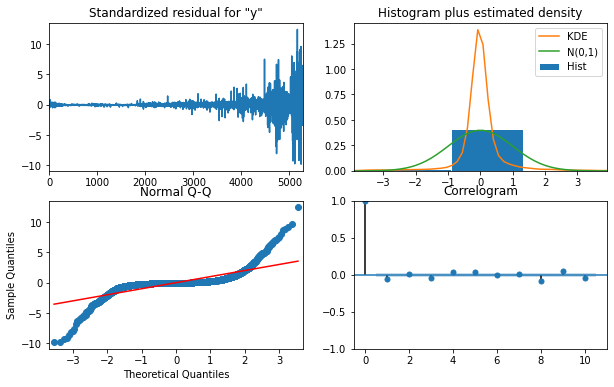

In [179]:
train_samplee = amzn["Close"].diff().iloc[1:].values
modells = sm.tsa.SARIMAX(train_samplee,order=(4,0,4),trend='c')
resulta = modells.fit(maxiter=1000,disp=False)
print(resulta.summary())
predicted_resulta = resulta.predict(start=0, end=500)
resulta.plot_diagnostics()
# calculating error
rmse3 = math.sqrt(mean_squared_error(train_samplee[1:502], predicted_resulta))
print("The root mean squared error is {}.".format(rmse3))

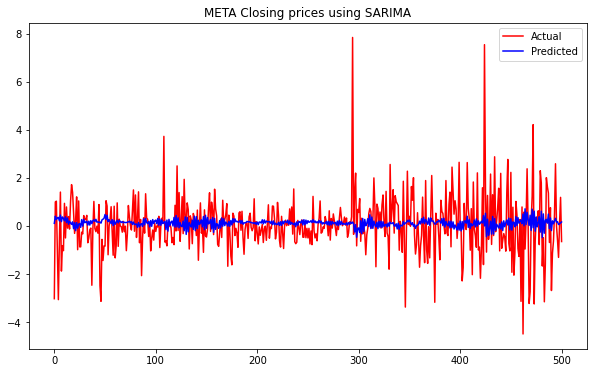

In [180]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('META Closing prices using SARIMA')
plt.show()

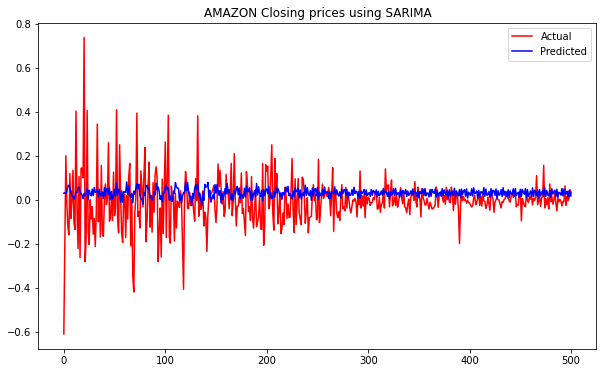

In [181]:
plt.plot(train_samplee[1:502],color='red')
plt.plot(predicted_resulta,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('AMAZON Closing prices using SARIMA')
plt.show()